In [57]:
from pathlib import Path

import albumentations
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

plt.rcParams['figure.figsize'] = 10, 20

In [2]:
import sys

sys.path.append('../')

from src.train.train_helper import run_train

In [58]:
root = Path('../data/images/')

In [60]:
from albumentations import Resize, Compose, Normalize, HorizontalFlip, RandomBrightnessContrast, OneOf
from albumentations import ShiftScaleRotate, HueSaturationValue, ToGray, RGBShift, RandomGamma

albumentations_transform = Compose([
    HorizontalFlip(p=0.5),  # Зеркальное отражение изображения с 50%-ной вероятностью
    ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, interpolation=1, border_mode=4, p=1),
    # Сдвиг, поворот и масштабироване изображения
    # Одно из двух: либо сдвиг яркости и контраста, либо случайная гамма изображения
    OneOf([
        RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.0, p=1),
        RandomGamma(p=1)
    ])
],
additional_targets={'image2': 'image'},
)

# Create validation dataset

In [66]:
df = pd.read_csv('../data/val_initial.csv', index_col=0)
df.head()

,cleared,ribs
13,cleared/bone_suppression_042.jpg,ribs/bone_suppression_041.jpg
32,cleared/bone_suppression_112.jpg,ribs/bone_suppression_111.jpg
24,cleared/bone_suppression_142.jpg,ribs/bone_suppression_141.jpg
25,cleared/bone_suppression_202.jpg,ribs/bone_suppression_201.jpg


## Visualize augmentations

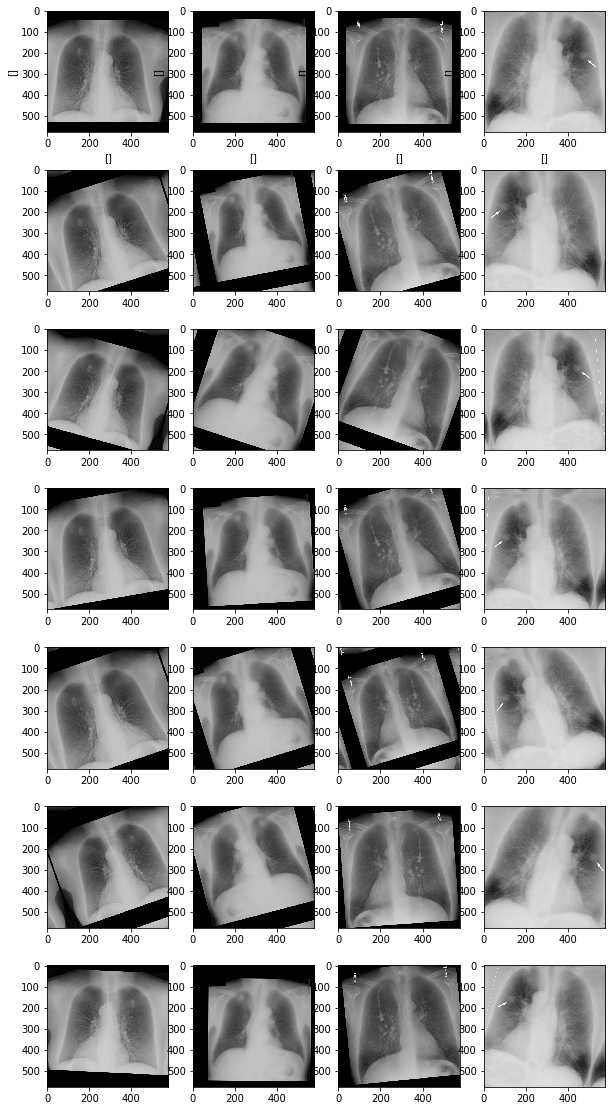

In [61]:
# Отображение оригиналов (1-й ряд)
for idx, row in df.reset_index().iterrows():
    img = cv2.imread(str(root / row['cleared']))
    plt.subplot(7, 4, idx + 1)
    plt.xlabel([]); plt.ylabel([])
    plt.imshow(img)

# Отображение аугментаций (2-7 ряды)
for j in range(1, 7):
    for idx, row in df.reset_index().iterrows():
        img = cv2.imread(str(root / row['cleared']))
        img_ = albumentations_transform(image=img)['image']
        plt.subplot(7, 4, idx + 1 + 4 * j)
        plt.imshow(img_)

In [67]:
list_of_paths = []

for j in tqdm(range(0, 100)):
    for idx, row in df.reset_index().iterrows():
        cleared_path = str(root / row['cleared'])
        ribs_path = str(root / row['ribs'])

        cleared = cv2.imread(cleared_path)
        ribs = cv2.imread(ribs_path)
        
        out = albumentations_transform(image=cleared, image2=ribs)
        cleared_aug = out['image']
        ribs_aug = out['image2']
        
        cleared_save_path = f"{cleared_path[:-4]}_{j * len(df) + idx}.jpg"
        ribs_save_path = f"{ribs_path[:-4]}_{j * len(df) + idx}.jpg"
        
        cv2.imwrite(cleared_save_path, cleared_aug)
        cv2.imwrite(ribs_save_path, ribs_aug)
        
        list_of_paths.append({
            'cleared': cleared_save_path.replace(str(root), '')[1:],
            'ribs': ribs_save_path.replace(str(root), '')[1:],
        })

In [49]:
df_out = pd.DataFrame(list_of_paths)
df_out.to_csv('../data/val.csv')

# Create test dataset

In [64]:
df = pd.read_csv('../data/test_initial.csv', index_col=0)
df.head()

,cleared,ribs
0,cleared/bone_suppression_002.jpg,ribs/bone_suppression_001.jpg
1,cleared/bone_suppression_012.jpg,ribs/bone_suppression_011.jpg
2,cleared/bone_suppression_102.jpg,ribs/bone_suppression_101.jpg
3,cleared/bone_suppression_182.jpg,ribs/bone_suppression_181.jpg
4,cleared/bone_suppression_212.jpg,ribs/bone_suppression_211.jpg


In [65]:
list_of_paths = []

for j in tqdm(range(0, 100)):
    for idx, row in df.reset_index().iterrows():
        cleared_path = str(root / row['cleared'])
        ribs_path = str(root / row['ribs'])

        cleared = cv2.imread(cleared_path)
        ribs = cv2.imread(ribs_path)
        
        out = albumentations_transform(image=cleared, image2=ribs)
        cleared_aug = out['image']
        ribs_aug = out['image2']
        
        cleared_save_path = f"{cleared_path[:-4]}_{j * len(df) + idx}.jpg"
        ribs_save_path = f"{ribs_path[:-4]}_{j * len(df) + idx}.jpg"
        
        cv2.imwrite(cleared_save_path, cleared_aug)
        cv2.imwrite(ribs_save_path, ribs_aug)
        
        list_of_paths.append({
            'cleared': cleared_save_path.replace(str(root), '')[1:],
            'ribs': ribs_save_path.replace(str(root), '')[1:],
        })

In [55]:
df_out = pd.DataFrame(list_of_paths)
df_out.to_csv('../data/test.csv')